## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import clear_output

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-03-08 20:11:06,417] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward

0.04059802359226594


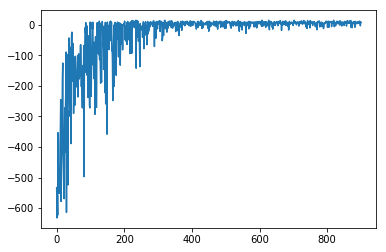

In [5]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print (agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

[2017-03-08 20:11:11,910] Making new env: CartPole-v0


first state:[ 0.01583422  0.00049038  0.00446218  0.02477349]


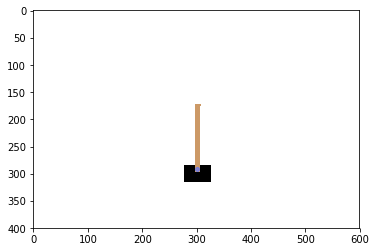

In [6]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

### State binarization

In [136]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):
        state[0] = int(state[0] * 2)
        state[1] = int(state[1] * 10)
        state[2] = int(state[2] * 50)
        state[3] = int(state[3] * 20)
        return tuple(state)

In [137]:
env = Binarizer(gym.make("CartPole-v0"))

[2017-03-08 20:36:18,002] Making new env: CartPole-v0


In [138]:
agent = QLearningAgent(alpha=0.1, epsilon=0.25,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [139]:
rewards = []

mean reward 165.05


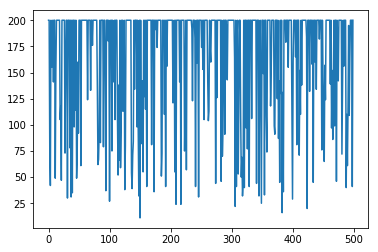

In [140]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i % 500 == 0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards[-500:])
        plt.show()

mean reward 199.24


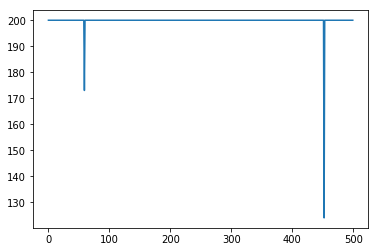

In [141]:
for i in range(20000):
    rewards.append(play_and_train(env,agent))    
    if i % 500 == 0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards[-500:])
        plt.show()
    agent.epsilon *= 0.9999

In [144]:
def generate_session(t_max=10 ** 4):
    states,actions = [],[]
    total_reward = 0
    
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        states.append(s)
        actions.append(a)
        s = next_s
        total_reward +=r
        
        if done:break
    return states,actions,total_reward

In [146]:
env=Binarizer(gym.make("CartPole-v0"))
env.reset()

[2017-03-08 20:46:52,205] Making new env: CartPole-v0


(0.0, 0.0, 0.0, 0.0)

In [147]:
import gym.wrappers
env = gym.wrappers.Monitor(env,directory="videos",force=True)
sessions = [generate_session() for _ in range(100)]
env.close()
env = env.env.env

[2017-03-08 20:46:59,131] Starting new video recorder writing to /home/mlevkov/rl/Practical_RL/week2/alternative/videos/openaigym.video.1.4898.video000000.mp4
[2017-03-08 20:47:02,626] Starting new video recorder writing to /home/mlevkov/rl/Practical_RL/week2/alternative/videos/openaigym.video.1.4898.video000001.mp4
[2017-03-08 20:47:06,082] Starting new video recorder writing to /home/mlevkov/rl/Practical_RL/week2/alternative/videos/openaigym.video.1.4898.video000008.mp4
[2017-03-08 20:47:09,636] Starting new video recorder writing to /home/mlevkov/rl/Practical_RL/week2/alternative/videos/openaigym.video.1.4898.video000027.mp4
[2017-03-08 20:47:13,282] Starting new video recorder writing to /home/mlevkov/rl/Practical_RL/week2/alternative/videos/openaigym.video.1.4898.video000064.mp4
[2017-03-08 20:47:16,942] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/mlevkov/rl/Practical_RL/week2/alternative/videos')


In [151]:
for m in gym.wrappers.monitoring._open_monitors():
    m.close()

[2017-03-08 20:50:26,566] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/mlevkov/rl/Practical_RL/week2/alternative/videos')


In [152]:
gym.upload('./videos/', api_key='sk_4jCBY9XTQJCSQ0CSYTPhMg')

[2017-03-08 20:50:27,956] [CartPole-v0] Uploading 100 episodes of training data
[2017-03-08 20:50:30,073] [CartPole-v0] Uploading videos of 5 training episodes (53816 bytes)
[2017-03-08 20:50:30,996] [CartPole-v0] Creating evaluation object from ./videos/ with learning curve and training video
[2017-03-08 20:50:31,602] 
****************************************************
You successfully uploaded your evaluation on CartPole-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_bMREGdcgQg2XZDKYM8VtZQ

****************************************************


Solved